2. IncrementalPCA:

    Processamento em blocos: O IncrementalPCA é uma variação do PCA que pode ser aplicada quando os dados são muito grandes para serem carregados na memória de uma vez. Ele usa um método baseado em algoritmos de aprendizado incremental, onde os dados são processados em blocos (batches).

    Uso eficiente de memória: Em vez de carregar todos os dados na memória, o IncrementalPCA ajusta o modelo com dados em partes (blocos) e, em seguida, atualiza os componentes principais à medida que os dados são processados.

    Ideal para grandes conjuntos de dados: É especialmente útil quando você trabalha com grandes volumes de dados ou quando os dados chegam em fluxo (por exemplo, streaming ou datasets grandes). Ele permite que o PCA seja aplicado em sistemas com memória limitada.

    Menor custo computacional: O processo é mais eficiente em termos de tempo e memória, pois as operações de ajuste e decomposição são feitas de maneira incremental.

In [2]:
#Bibliothek

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import scipy.io
from PIL import Image 
from sklearn.decomposition import PCA
from matplotlib import image as mimage



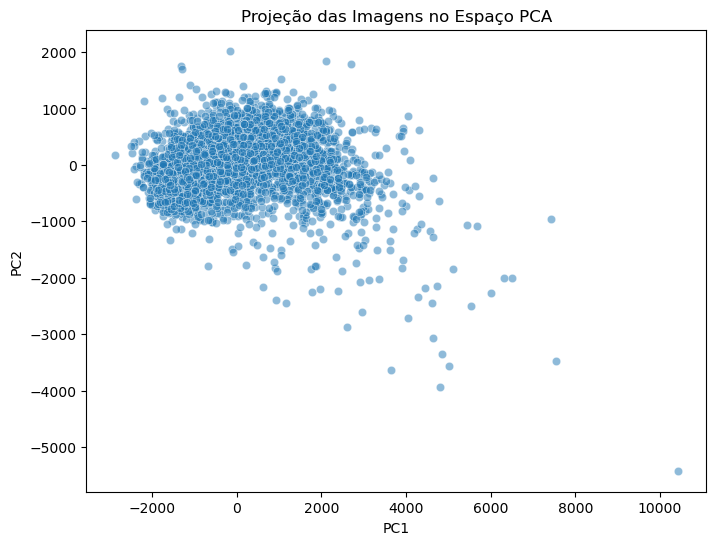

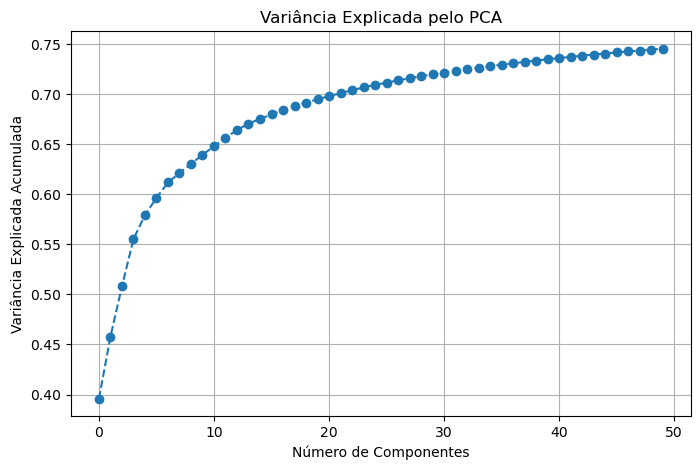

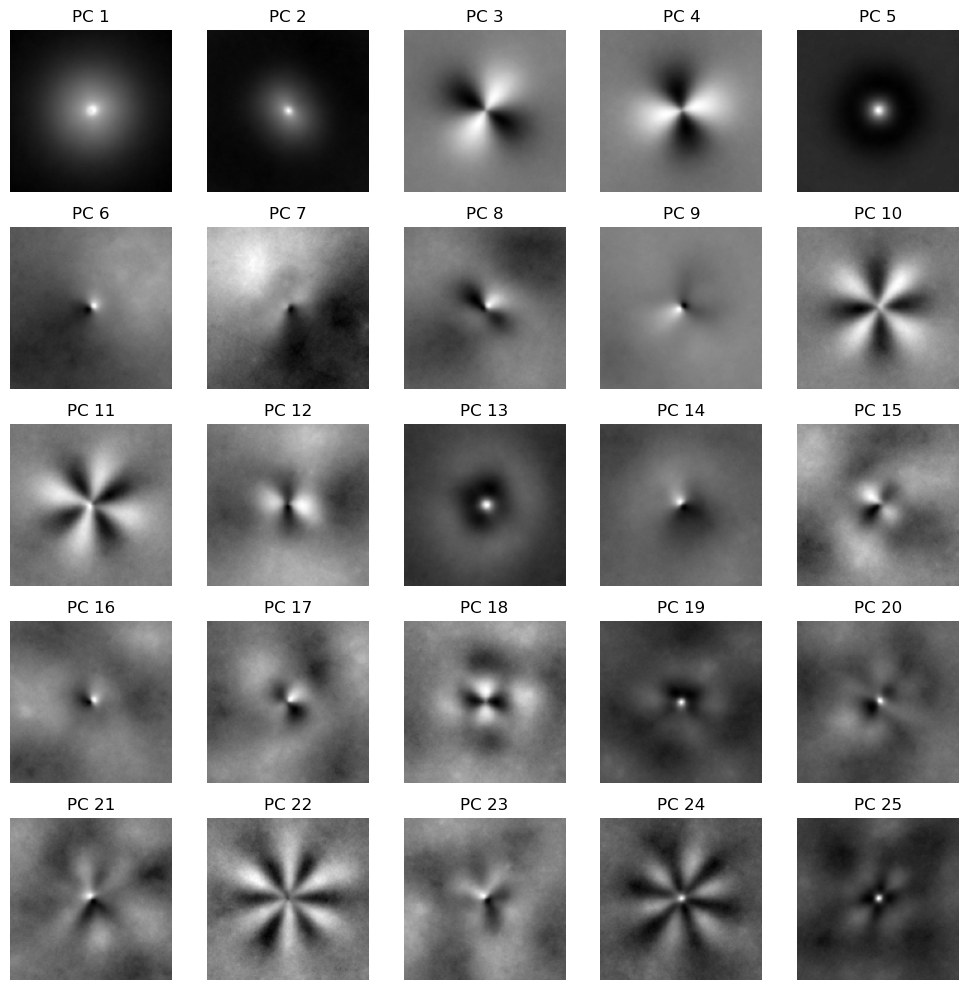

In [4]:
#INCREMENTAL 

from sklearn.decomposition import IncrementalPCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Diretório das imagens
base_dir = './png'
image_size = (128, 128)  # Ajuste conforme o tamanho das imagens de galáxias
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.png')]  # Ajuste a extensão conforme necessário

# Carregar e processar cada imagem
for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img = img.resize(image_size)  # Redimensiona a imagem, se necessário
    img_array = np.array(img).flatten()  # Achata a imagem
    image_list.append(img_array)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")


# Defina o número de componentes e o tamanho do batch
n_components = 50  # Ajuste conforme necessário
batch_size = 50  # Define o tamanho dos blocos processados de cada vez

# Inicializar o IncrementalPCA
pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Ajuste o modelo com os dados
pca.fit(X)

# Transformar os dados para o espaço PCA
X_pca = pca.transform(X)

# Plotar a projeção no espaço PCA (PC1 vs PC2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projeção das Imagens no Espaço PCA")
plt.show()

# Plotar a variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada pelo PCA")
plt.grid()
plt.show()

# Plotar as primeiras componentes principais em um grid 5x5
fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # Grid 5x5 para visualização das componentes
for i, ax in enumerate(axes.flat):
    if i < n_components:
        component = pca.components_[i].reshape(128, 128)  # Ajuste para o tamanho original da imagem
        ax.imshow(component, cmap='gray')
        ax.set_title(f"PC {i+1}")
        ax.axis("off")

plt.tight_layout()
plt.show()
